# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [32]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [33]:
yf.pdr_override()
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Use pandas datareader to fetch the data

In [34]:
# Bank of America
BAC = data.get_data_yahoo("BAC", start, end)
# CitiGroup
C = data.get_data_yahoo("C", start, end)
# Goldman Sachs
GS = data.get_data_yahoo("GS", start, end)
# JPMorgan Chase
JPM = data.get_data_yahoo("JPM", start, end)
# Morgan Stanley
MS = data.get_data_yahoo("MS", start, end)
# Wells Fargo
WFC = data.get_data_yahoo("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
# Concat all these Dataframes like shown in the next cell
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],axis=1)

In [36]:
bank_stocks.head()

BAC                                                          \
                 Open       High        Low      Close  Adj Close      Volume   
Date                                                                            
2006-01-03  46.919998  47.180000  46.150002  47.080002  35.054218  16296700.0   
2006-01-04  47.000000  47.240002  46.450001  46.580002  34.681938  17757900.0   
2006-01-05  46.580002  46.830002  46.320000  46.639999  34.726604  14970700.0   
2006-01-06  46.799999  46.910000  46.349998  46.570000  34.674480  12599800.0   
2006-01-09  46.720001  46.970001  46.360001  46.599998  34.696808  15619400.0   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                   WFC                        \
                Close  Adj Close     Volume       Open       High        Low   
Date                                                                           
2006-01-03  58.310001  37.399338  5377000.0  31.600000  31.975000  31.195000   
2006-01-04  58.349998  37.424999  7977800.0  31.799999  31.820000  31.365000   
2006-01-05  58.509998  37.527611  5778000.0  31.500000  31.555000  31.309999   
2006-01-06  58.570000  37.566090  6889800.0  31.580000  31.775000  31.385000   
2006-01-09  59.189999  37.963749  4144500.0  31.674999  31.825001  31.555000   

                                              
                Close  Adj Close      Volume  
Date                                          
2006-01-03  31.900000  20.408512  11016400.0  
2006-01-04  31.530001  20.171795  10870000.0  
2006-01-05  31.495001  20.149401  10158000.0  
2006-01-06  31.680000  20.267757   8403800.0  
2006-01-09  31.674999  20.264565   5619600.0  

[5 rows x 36 columns]

In [37]:
# Set the column name levels 'Bank Ticker','Stock Info'
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [38]:
bank_stocks.head()

Bank Ticker        BAC                                              \
Stock Info        Open       High        Low      Close  Adj Close   
Date                                                                 
2006-01-03   46.919998  47.180000  46.150002  47.080002  35.054218   
2006-01-04   47.000000  47.240002  46.450001  46.580002  34.681938   
2006-01-05   46.580002  46.830002  46.320000  46.639999  34.726604   
2006-01-06   46.799999  46.910000  46.349998  46.570000  34.674480   
2006-01-09   46.720001  46.970001  46.360001  46.599998  34.696808   

Bank Ticker                       C                                      ...  \
Stock Info       Volume        Open        High         Low       Close  ...   
Date                                                                     ...   
2006-01-03   16296700.0  490.000000  493.799988  481.100006  492.899994  ...   
2006-01-04   17757900.0  488.600006  491.000000  483.500000  483.799988  ...   
2006-01-05   14970700.0  484.399994  487.799988  484.000000  486.200012  ...   
2006-01-06   12599800.0  488.799988  489.000000  482.000000  486.200012  ...   
2006-01-09   15619400.0  486.000000  487.399994  483.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info         Low      Close  Adj Close     Volume       Open       High   
Date                                                                            
2006-01-03   56.740002  58.310001  37.399338  5377000.0  31.600000  31.975000   
2006-01-04   58.349998  58.349998  37.424999  7977800.0  31.799999  31.820000   
2006-01-05   58.020000  58.509998  37.527611  5778000.0  31.500000  31.555000   
2006-01-06   58.049999  58.570000  37.566090  6889800.0  31.580000  31.775000   
2006-01-09   58.619999  59.189999  37.963749  4144500.0  31.674999  31.825001   

Bank Ticker                                               
Stock Info         Low      Close  Adj Close      Volume  
Date                                                      
2006-01-03   31.195000  31.900000  20.408512  11016400.0  
2006-01-04   31.365000  31.530001  20.171795  10870000.0  
2006-01-05   31.309999  31.495001  20.149401  10158000.0  
2006-01-06   31.385000  31.680000  20.267757   8403800.0  
2006-01-09   31.555000  31.674999  20.264565   5619600.0  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

Let me know if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [39]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

* Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [40]:
returns = pd.DataFrame()

- We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [41]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


* Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

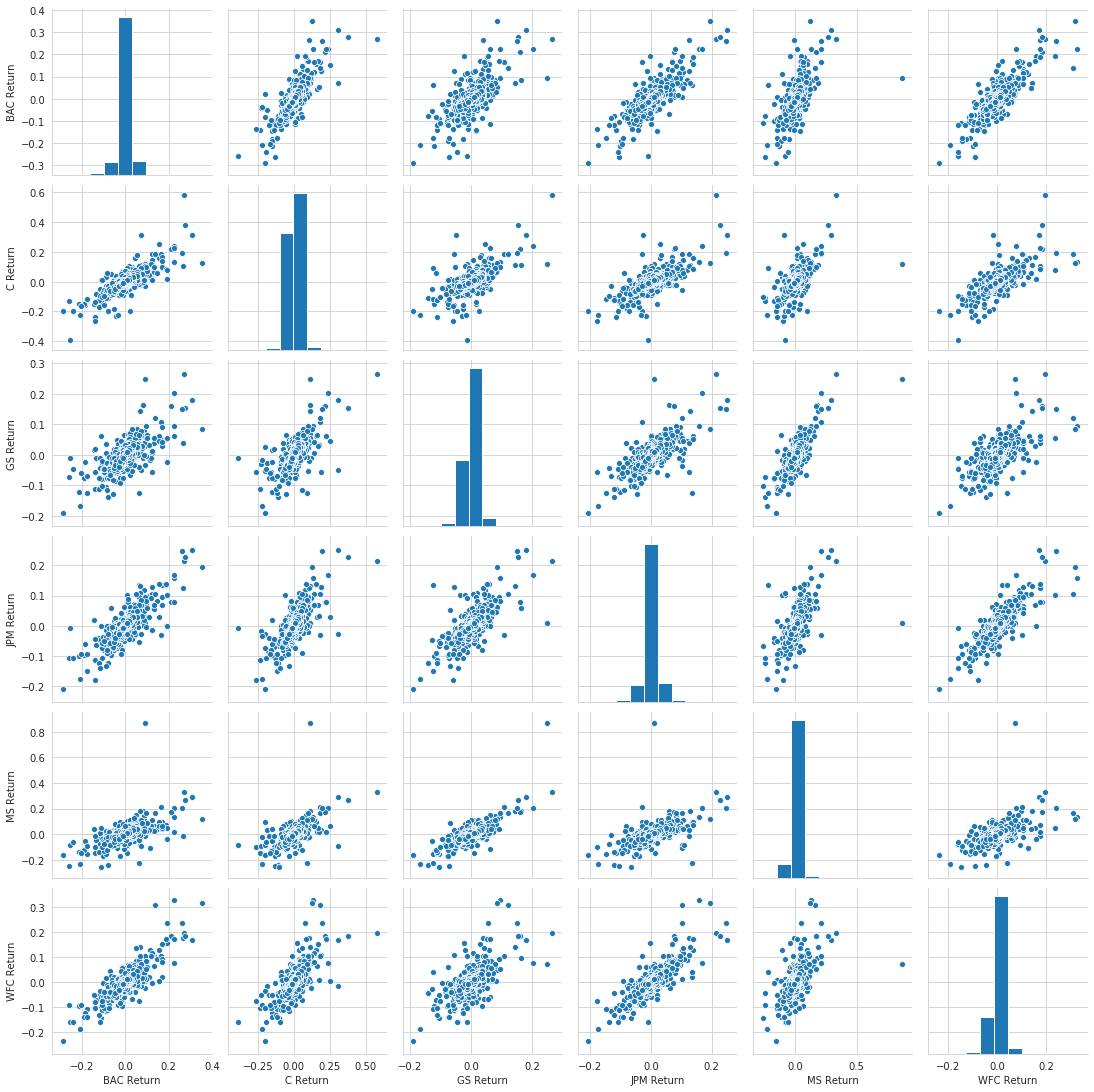

In [42]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

* Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [43]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [44]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

* Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [45]:
returns.std() 

BAC Return    0.036640
C Return      0.038664
GS Return     0.025385
JPM Return    0.027662
MS Return     0.037812
WFC Return    0.030232
dtype: float64

* Create a distplot using seaborn of the 2015 returns for Morgan Stanley

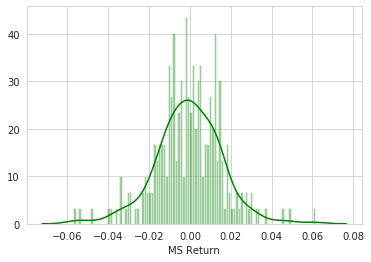

In [48]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

* Create a distplot using seaborn of the 2008 returns for CitiGroup 

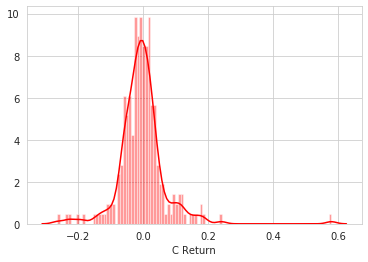

In [49]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

* Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)

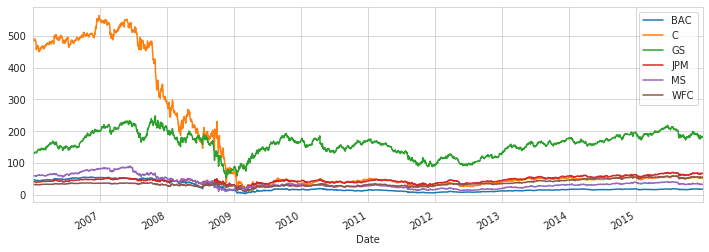

In [23]:
# Using for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

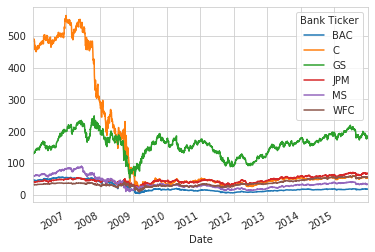

In [24]:
# Using .xs
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [25]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

*** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008***

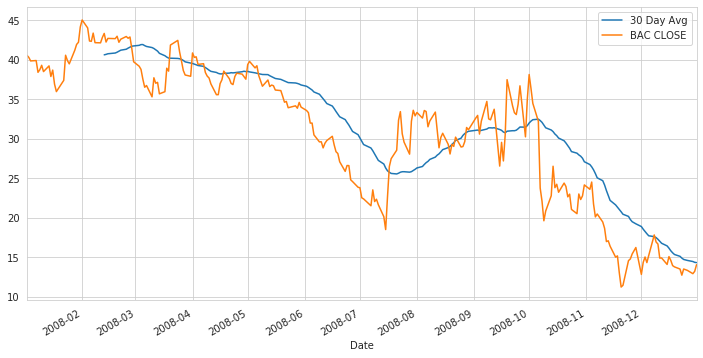

In [26]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

* Create a heatmap of the correlation between the stocks Close Price.

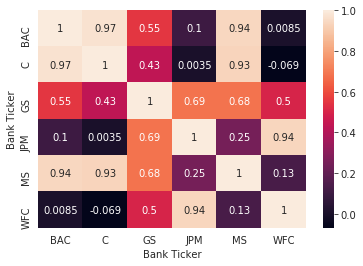

In [27]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

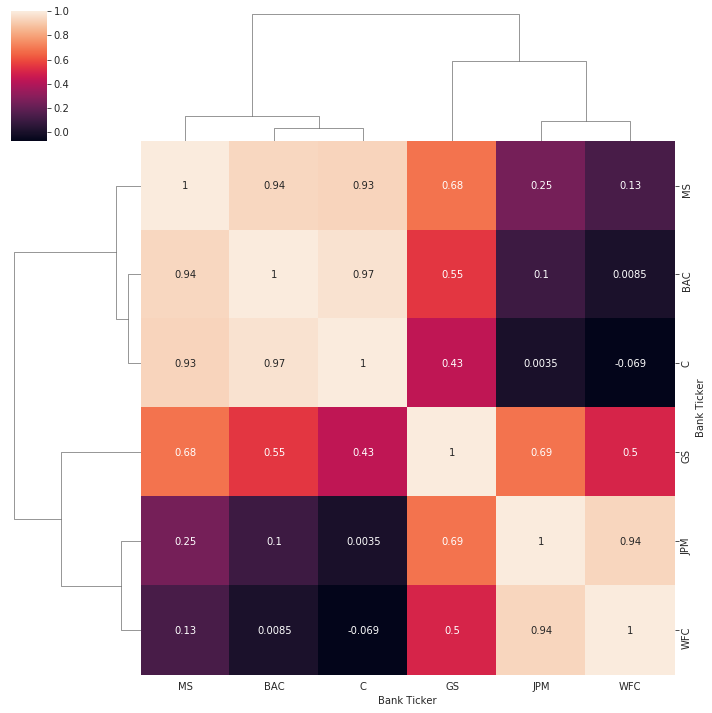

In [28]:
# seaborn cluster map
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

* Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [29]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

* Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015

In [30]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [31]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')